In [ ]:

import tensorflow as tf

# Check for TensorFlow GPU access
print(f"TensorFlow has access to the following devices:\n{tf.config.list_physical_devices()}")

# See TensorFlow version
print(f"TensorFlow version: {tf.__version__}")

In [1]:
from os import chdir
chdir("../")   # only run this ones else error will occur


In [2]:
import numpy as np

from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
from IPython.display import clear_output

from datetime import datetime

In [3]:
X_train_l = np.load('private/npy/X_train_gender.npy')
X_test_l = np.load('private/npy/X_test_gender.npy')
y_train_l = np.load('private/npy/y_train_gender.npy')
y_test_l = np.load('private/npy/y_test_gender.npy')

In [4]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 130, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
  
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    return model


In [5]:
model = create_model()
epochs=10
history = model.fit(X_train_l, y_train_l, epochs=epochs, validation_data=(X_test_l, y_test_l), batch_size=64,verbose=1)

2024-02-14 00:11:25.846910: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-14 00:11:25.846981: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-14 00:11:25.847008: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-14 00:11:25.847647: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-14 00:11:25.848021: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2024-02-14 00:11:27.299347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - ETA: 0s - loss: 0.7304 - accuracy: 0.5976

2024-02-14 00:11:48.502301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


151/151 [==============================] - 23s 141ms/step - loss: 0.7304 - accuracy: 0.5976 - val_loss: 0.6681 - val_accuracy: 0.6077
Epoch 2/10
151/151 [==============================] - 20s 132ms/step - loss: 0.6522 - accuracy: 0.6178 - val_loss: 0.5418 - val_accuracy: 0.7475
Epoch 3/10
151/151 [==============================] - 20s 131ms/step - loss: 0.3892 - accuracy: 0.8141 - val_loss: 0.4478 - val_accuracy: 0.7862
Epoch 4/10
151/151 [==============================] - 20s 133ms/step - loss: 0.2270 - accuracy: 0.9084 - val_loss: 0.2056 - val_accuracy: 0.9164
Epoch 5/10
151/151 [==============================] - 20s 134ms/step - loss: 0.1713 - accuracy: 0.9334 - val_loss: 0.1685 - val_accuracy: 0.9368
Epoch 6/10
151/151 [==============================] - 20s 132ms/step - loss: 0.1112 - accuracy: 0.9585 - val_loss: 0.1456 - val_accuracy: 0.9476
Epoch 7/10
151/151 [==============================] - 20s 132ms/step - loss: 0.0880 - accuracy: 0.9694 - val_loss: 0.1092 - val_accuracy: 0.9

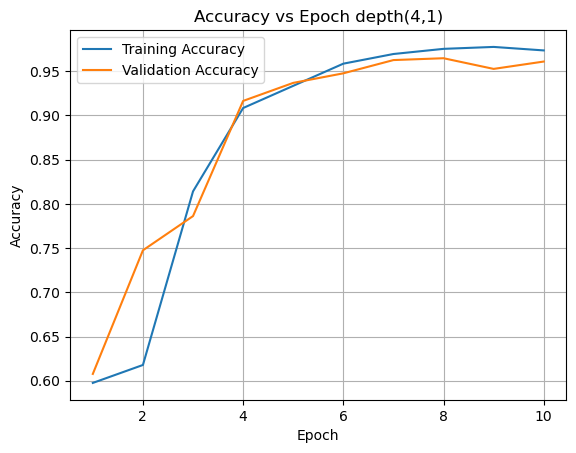

In [6]:
# Extract training and validation accuracies
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create plot
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_acc, label='Validation Accuracy')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch depth(4,1)')
plt.legend()
plt.grid(True)

current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
filename = f"testing records/validation_accuracy_{current_time}.png"
plt.savefig(filename)